### <a href='#section1'>1. Изучение данных и общей информации</a>
### <a href='#section2'>2. Подготовка данных</a>
### <a href='#section3'>3. Исследовательский анализ данных</a>
### <a href='#section4'>4. Составление портрета пользователя каждого региона</a>
### <a href='#section5'>5. Проверка гипотез</a>
### <a href='#section6'>6. Общий вывод</a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

from scipy import stats as st

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

from datetime import datetime

In [3]:
pd.set_option('display.max_columns', 500)
pd.options.display.float_format = '{:,.2f}'.format

### <a id='section1'>1. Изучение данных и общей информации</a> 

In [4]:
games = pd.read_csv('/datasets/games.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN


In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Вывод: Как видим представленные нам данные далеки от идеала: необходимо будет поработать с названиями столбцов, типами данных в них и заполнить пропуски.

### <a id='section2'>2. Подготовка данных</a>

##### Названия столбцов приведем к нижнему регистру

In [6]:
games.columns = games.columns.str.lower()

#### Проверим что получилось

In [7]:
games.columns.tolist()

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']

#### Преобразуем данные в нужные типы: это дата релиза и пользовательский рейтинг

In [8]:
#прежде чем поменяем тип данных удалим игры с пустым годом релиза, их небольшое количество, поэтому они не повлияют на результат
games.drop(games[games['year_of_release'].isnull()].index, inplace=True)
games['year_of_release'] = games['year_of_release'].astype('int')
games['year_of_release'] = pd.to_datetime(games['year_of_release'], format='%Y').dt.year
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN


In [9]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [10]:
#TBD — сокращение от To Be Determined. Служит для отметки неясностей или пропусков, которые надо заполнить.
games.loc[games['user_score'] == 'tbd','user_score'] = np.nan
games['user_score'] = games['user_score'].astype('float')
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16446 non-null object
year_of_release    16446 non-null int64
genre              16444 non-null object
na_sales           16446 non-null float64
eu_sales           16446 non-null float64
jp_sales           16446 non-null float64
other_sales        16446 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


#### Теперь поработаем с пропусками

In [11]:
print(games.isna().mean())

name              0.00
platform          0.00
year_of_release   0.00
genre             0.00
na_sales          0.00
eu_sales          0.00
jp_sales          0.00
other_sales       0.00
critic_score      0.51
user_score        0.55
rating            0.41
dtype: float64


In [12]:
games['rating'] = games['rating'].fillna('out of rating')
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,nan,nan,out of rating
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,nan,nan,out of rating


#### Посчитаем суммарные продажи по всем регионам

In [13]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,nan,nan,out of rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,nan,nan,out of rating,31.38


#### Вывод: при подготовке данных к анализу были заполненны пропуски, заменено значение TBD на Nan в колонке 'user_score', во всех клонках установлен правильный тип данных, также были посчитаны суммарные мировые продажи.

### <a id='section3'>3. Исследовательский анализ данных</a>

#### Посмотрим сколько игр выпускалось в разные годы.

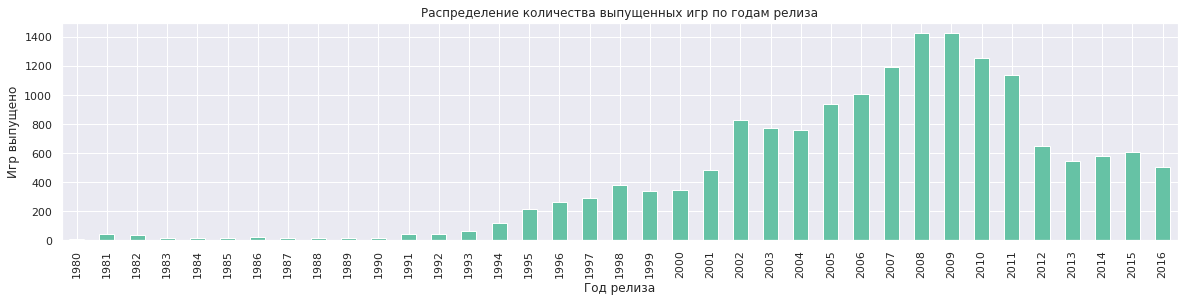

In [47]:
games.groupby('year_of_release')['year_of_release'].count().plot(kind='bar', figsize=(20,4))
sb.set()
sb.set_palette('Set2')
plt.title('Распределение количества выпущенных игр по годам релиза')
plt.ylabel('Игр выпущено')
plt.xlabel('Год релиза')
plt.show()

Сейчас мы прогнозируем на 2017 год. Поэтому не будем рассматривать старые периоды, а возьмем последние 5 лет(2012-2016 гг.), к тому же как видно из диаграммы в эти года выходило примерно одинаковое количество игр.

#### Теперь рассмотрим продажи по платформам.

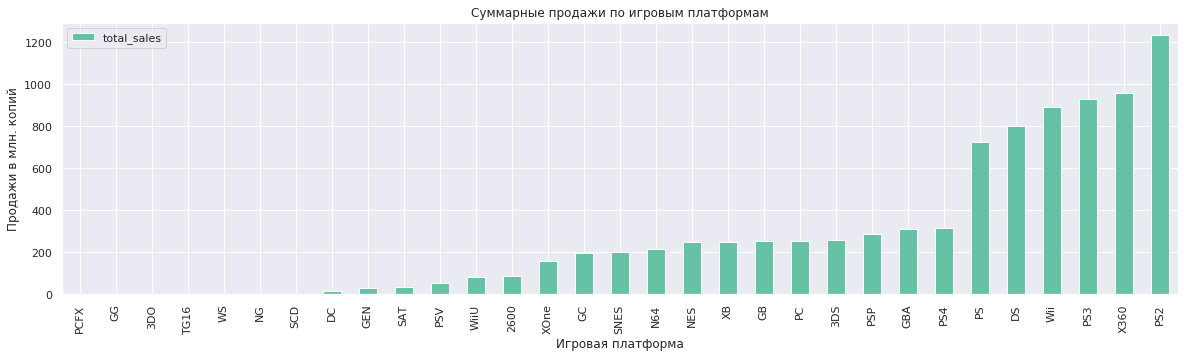

In [45]:
platform_pivot = (games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales'))
platform_pivot.plot(kind='bar', figsize=(20,5))
plt.title('Суммарные продажи по игровым платформам')
plt.ylabel('Продажи в млн. копий')
plt.xlabel('Игровая платформа')
plt.show()

Как видим 6 платформ явно выделяются из общей массы, поэтому отберем данные по ним отдельно.

In [46]:
platforms = platform_pivot.sort_values(by='total_sales', ascending=False)[0:6].index
games_platforms = games.query('platform in @platforms')
games_platforms

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.00,8.50,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.00,6.60,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,nan,nan,out of rating,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,nan,nan,E,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,nan,nan,out of rating,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,nan,nan,out of rating,0.01


Построим распределением продаж по платформам по годам, для этого создадим функцию

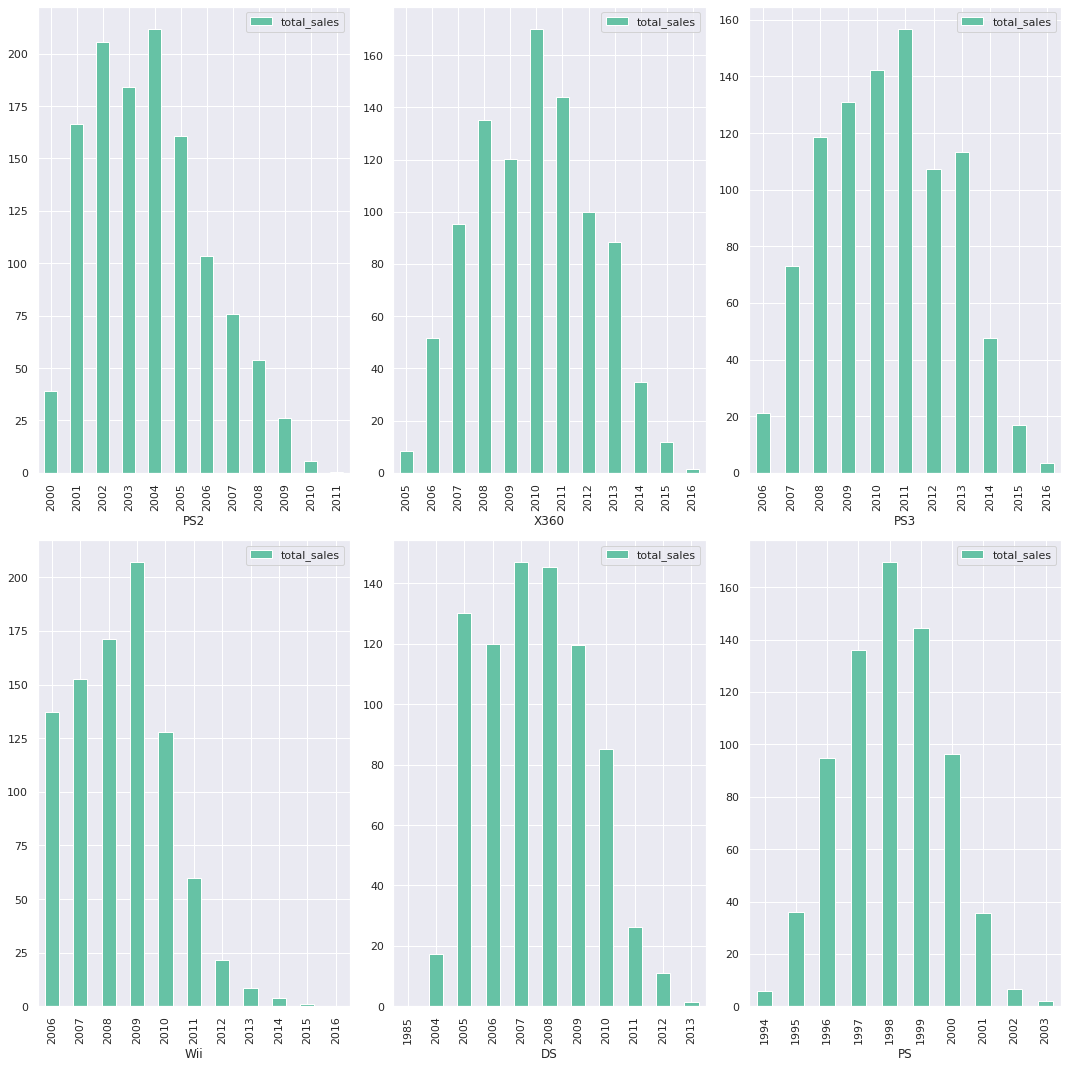

In [17]:
def platform_sales(data, my_list,n,m, ysize):
    temp = data.pivot_table(index=['platform','year_of_release'], values='total_sales', aggfunc='sum')
    plt.subplots(n,m,figsize=(15,ysize))
    i = 1
    for platform in my_list:
        ax = plt.subplot(n,m,i)
        l = list(temp.query('platform==@platform').index.get_level_values(1))
        temp.query('platform==@platform').plot(kind='bar', ax=ax, label=platform)
        plt.legend()
        plt.xlabel(platform)
        i+=1
        ax.set_xticklabels(l)
    plt.tight_layout()
platform_sales(games_platforms, platforms,2,3, 15)

Как видим из графиков, выделяется только Wii, которая резко стартовала и потом также быстро упала. Другие платформы постепенно повышали продажи, достигали своего пика и потом начинали угасать. Примерным промежутком времени в который появляются новые плафтормы и исчезают старые можно назвать 10 лет.

#### Мы уже выделили период актуальный для изучения, поэтому выделим данные по нему в отдельную таблицу.

In [18]:
games_period = games.query('2012 <= year_of_release <= 2016')
games_period.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4    314.14
PS3    288.79
X360   236.54
3DS    194.61
XOne   159.32
WiiU    82.19
PC      62.65
PSV     49.18
Wii     35.37
DS      12.55
PSP     11.19
Name: total_sales, dtype: float64

Из списка берем 5 самых прибыльных платформ и изучим данные по ним

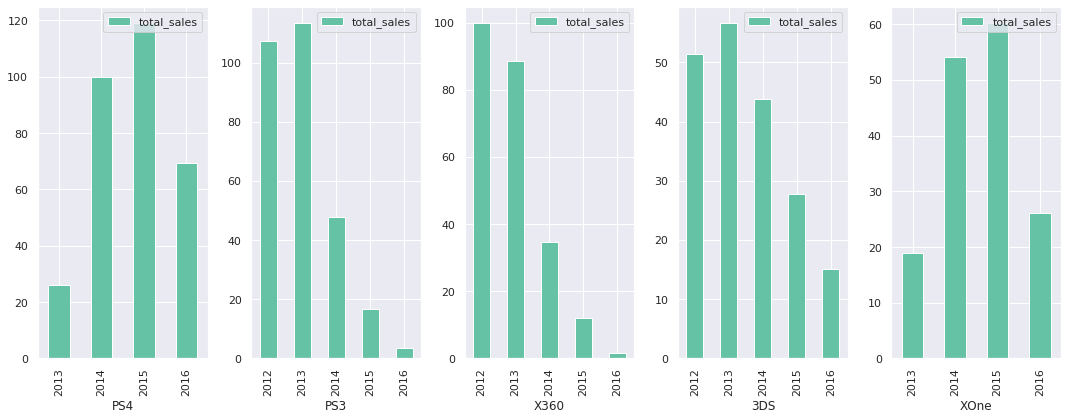

In [19]:
top_platforms = games_period.groupby('platform')['total_sales'].sum().sort_values(ascending=False).index[0:5]
games_top5_platforms = games_period.query('platform in @top_platforms')
platform_sales(games_top5_platforms, top_platforms, 1, 5, 6)

Даже взяв 5 самых прибыльных платформ мы можем видеть, что к концу актуального для нас периода продажи по ним падают. Потенциально прибыльными в 2017 году могут остаться: PS4, 3DS и XOne.

#### Теперь проанализируем продажи по играм, выбрав топ10 самых продаваемых

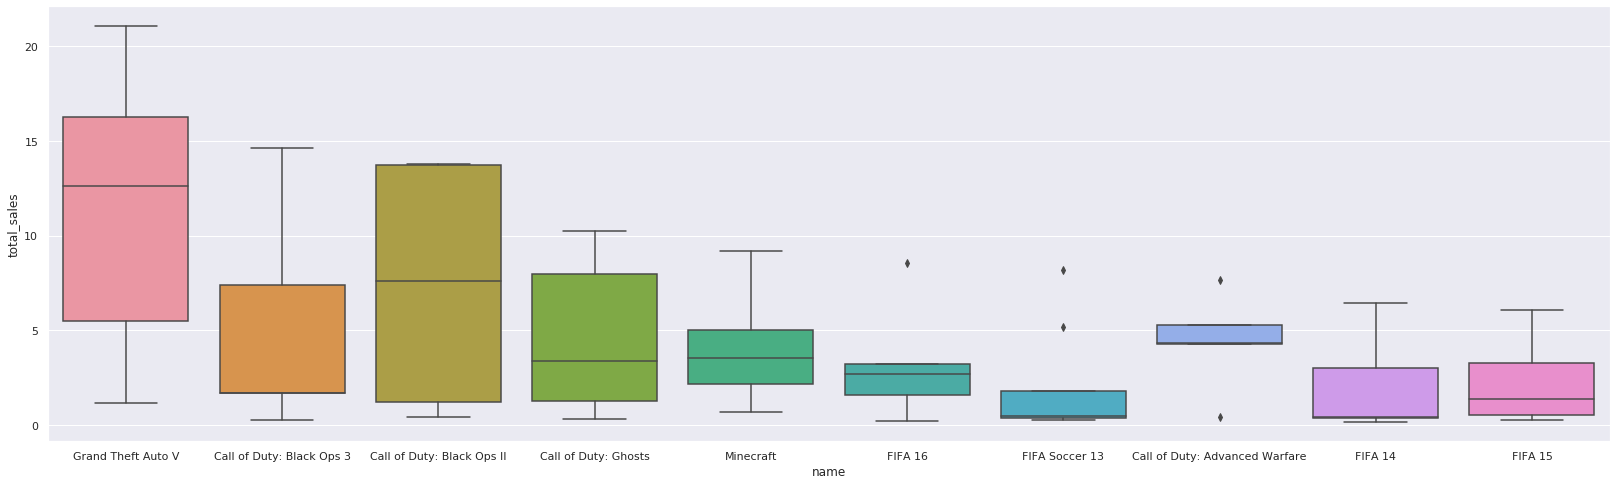

In [20]:
top10_games = games_period.groupby('name')['total_sales'].sum().sort_values(ascending=False)[0:10]
plt.figure(figsize=(28,8))
sb.boxplot(data=games_period.query('name in @top10_games.index'), x='name', y='total_sales')
plt.show()

#### А теперь посмотрим как распределены продажи этих игр по платформам

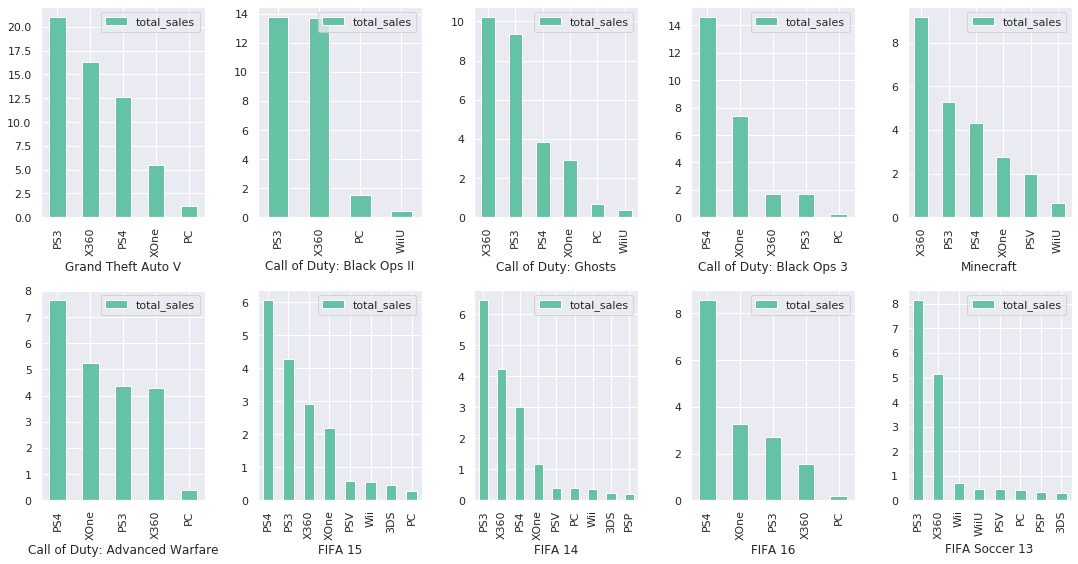

In [21]:
plt.subplots(2,5,figsize=(15,8))
i = 1
for game in top10_games.index:
    ax=plt.subplot(2,5,i)
    games_period.query('name==@game').plot(kind='bar', x='platform', y='total_sales', ax=ax)
    ax.set_xlabel(game)
    i += 1
plt.tight_layout()

Судя по графикам, популярные игры имеют большие продажи на одних и тех же платформах, стоит отметить, что это не зависит от жанра игры: популярны как спортивные симуляторы, так и экшены.

#### Теперь посомтрим на глобальные продажи игр по платформам

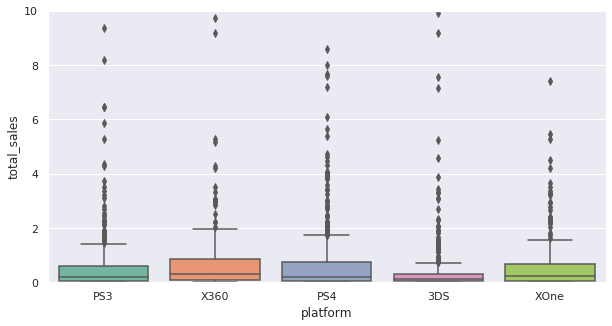

In [22]:
plt.figure(figsize=(10,5))
sb.boxplot(data=games_top5_platforms, x='platform', y='total_sales')
plt.ylim(0,10)
plt.show()

Как и следовало ожидать самые прибыльные платформы выпускают игры которые находятся в топ-10 по продажам.

#### Теперь посмотрим, как влияют на продажи внутри одной популярной платформы(для исследования берем PS3) отзывы пользователей и критиков

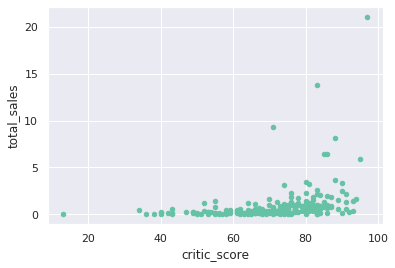

In [23]:
games_period.query('platform=="PS3"').plot(kind='scatter', x='critic_score', y='total_sales')
plt.show()

In [24]:
games_period.query('platform=="PS3"')['critic_score'].corr(games_period.query('platform=="PS3"')['total_sales'])

0.3314972592629587

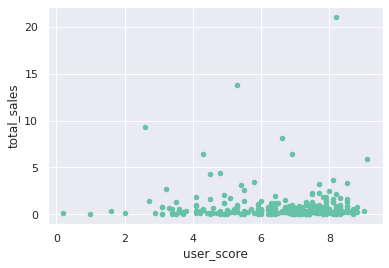

In [25]:
games_period.query('platform=="PS3"').plot(kind='scatter', x='user_score', y='total_sales')
plt.show()

In [26]:
games_period.query('platform=="PS3"')['user_score'].corr(games_period.query('platform=="PS3"')['total_sales'])

-0.005143522887113815

По диаграммам рассеяния и коэффициентам корреляции Пирсона видим, что есть слабая положительная зависимость продаж от оценки критиков. От оценки пользователей зависимости нет.

#### Теперь проверим корреляцию на других платформах

In [27]:
platforms = games_period['platform'].unique()
for platform in platforms:
    temp = games_period.query('platform==@platform')
    print(platform,'коэффициент корреляции:',temp['critic_score'].corr(temp['total_sales']))

PS3 коэффициент корреляции: 0.3314972592629587
X360 коэффициент корреляции: 0.3605734888507336
PS4 коэффициент корреляции: 0.40656790206178095
3DS коэффициент корреляции: 0.3208028695360785
DS коэффициент корреляции: nan
XOne коэффициент корреляции: 0.4169983280084017
WiiU коэффициент корреляции: 0.34837976012017485
Wii коэффициент корреляции: -0.4243413011077494
PC коэффициент корреляции: 0.23724324311567915
PSV коэффициент корреляции: 0.0944878992931617
PSP коэффициент корреляции: nan


На большинстве платформ наблюдается корреляция между оценкой критиков и продажами.

#### Посмотрим на общее распределение игр по жанрам.

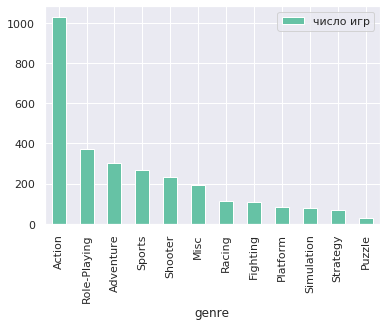

In [28]:
#распределение по количеству выпущенных игр
games_period.groupby('genre')['name'].count().sort_values(ascending=False).plot(kind='bar', label='число игр', legend=True)
plt.show()

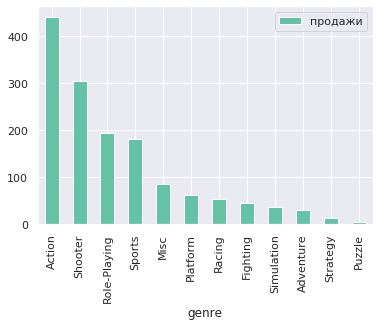

In [29]:
#распределение по продажам
games_period.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', label='продажи', legend=True)
plt.show()

По количестве выпущенных игр и их продажам лидирует жанр Action. Практически все другие жанры имеют прямую зависимость количества игр от суммы продаж. 2 исключения: Shooter(занимает по продажам 2 место, а по количеству игр только 5) и Adventure(3 место по количеству игр и только 11 по продажам)

# Вывод: 
* В результате исследований определили актуальный для нас период(2012-2016гг), также определили продолжительность жизни платформ(10 лет). 
* Определили 5 самых приыбльных платформ в актуальном периоде и самые продаваемые игры. 
* Рассмотрели корреляцию между продажами и оценками критиков и пользователей. 
* Определили самые популярные жанры игр по количесту и продажам.

### <a id='section4'>4. Составление портрета пользователя для каждого региона</a>

#### Найдем самые популярные платформы

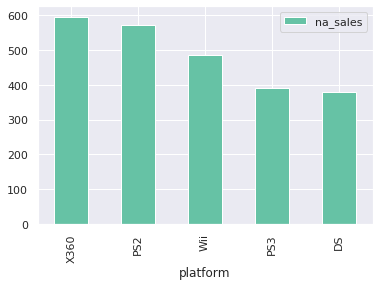

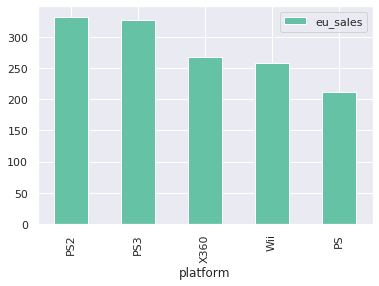

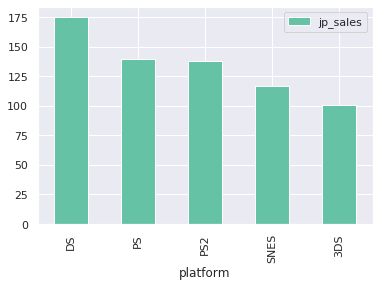

In [30]:
games.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
games.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
games.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')

#### Если в Европе и Америке платформы по популярности практически идентичны, то Япония явно выделяется своей платформой DS на 1 месте.

#### Теперь определим самые популярные жанры

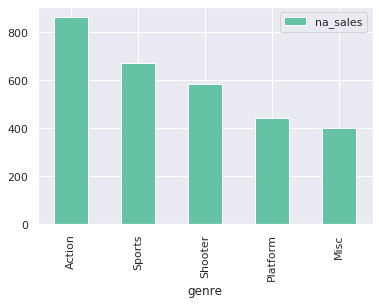

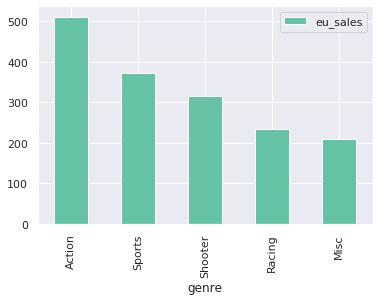

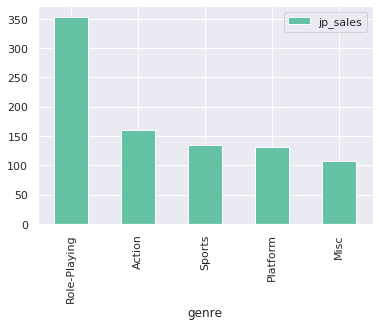

In [31]:
games.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
games.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
games.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')

#### В жанрах Япония тоже выделяется, у них "Ролевые игры" уверенно удерживают 1 место, хотя в Европе и Америке они не попали даже в топ-5

#### Рассмотрим рейтинг ESRB и проследим влияют ли он на продажи в каком-нибудь регионе

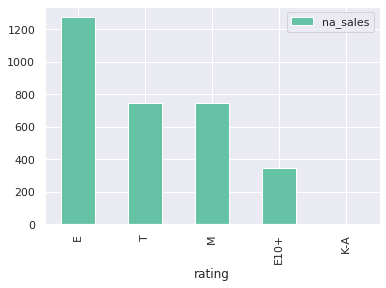

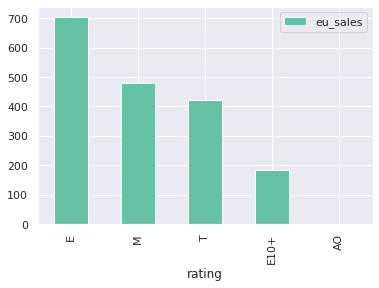

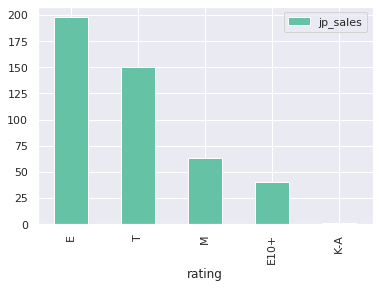

In [32]:
games_with_rating = games.loc[games['rating'] != 'out of rating']
games_with_rating.groupby(by='rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
games_with_rating.groupby(by='rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
games_with_rating.groupby(by='rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')

#### Первое место во всех регионах занимают игры без ограничений по возрасту('E'), второе и третье место делять игры для подростков('T') и для взрослых('M'). Следует отметить, что в Европе более популярны игры для взрослых, чем для подростков.

### <a id='section5'>5. Проверка гипотез</a>

* средний пользовательский рейтинг платформ Xbox One и PC одинаковый
* средний пользовательский рейтинг жанров Action и Sports разный
 
 Пороговое значение alpha задаем самостоятельно.

Будем использовать t-критерий Стьюдента, так как сравниваемые выборки независимы между собой.

Гипотезы:
* H0: средний пользовательский рейтинг платформ Xbox One и PC одинаковый
* H1: средний пользовательский рейтинг платформ Xbox One и PC различается

In [60]:
alpha = 0.05

XOne = games[(games['platform'] == 'XOne') & (games['user_score'] > 0)]['user_score']
PC = games[(games['platform'] == 'PC') & (games['user_score'] > 0)]['user_score']

print(XOne.var(ddof=1))
print(PC.var(ddof=1))

1.9069968429360695
2.349224375076853


In [62]:
#equal_var берем False так как дисперсии выборок не равны
results = st.ttest_ind(XOne, PC, equal_var = False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.5385802963771776e-06
Отвергаем нулевую гипотезу


Гипотезы:
* H0: средний пользовательский рейтинг жанров Action и Sports одинаковый
* H1: средний пользовательский рейтинг жанров Action и Sports различается

In [63]:
action = games[(games['genre'] == 'Action') & (games['user_score'] > 0)]['user_score']
sports = games[(games['genre'] == 'Sports') & (games['user_score'] > 0)]['user_score']

print(action.var(ddof=1))
print(sports.var(ddof=1))

2.027493768262496
2.623055812519272


In [65]:
##equal_var берем False так как дисперсии выборок не равны
results = st.ttest_ind(action, sports, equal_var = False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.07370217419278534
Не получилось отвергнуть нулевую гипотезу


#### Проверено две гипотезы. И вот какие выводы можно сделать: средние пользовательские рейтинги жанров Action и Sports близки по значению, а на  платформах Xbox One и PC различаются.

### 6. Общий вывод

Планируя кампанию на 2017 год стоит брать в расчет данные только за актуальный период(2012-2016 гг) и учитывать предпочтения пользователей в регионах, особенно выделяется Японию, с ее любовью к Role-playing и платформе DS. В Европе следует сосредоточится на жанре Action на платформе PS3 , в Северной Америке также на нем, но уже на платформе XBox One.